In [23]:
import numpy as np, local, plottools as pl, healpy as hp, pickle, curvedsky, tools_cmb, tools_lens, binning as bn
from matplotlib.pyplot import *

In [24]:
kwargs_cmb  = {\
    't':'id', \
    'fltr':'none', \
}
kwargs_qrec = {\
    'qlist':['EB'], \
    'rlmin':200, \
    'rlmax':1024, \
    'olmax':1024, \
    'nside':512, \
}

In [25]:
glob = local.analysis(snmin=1,snmax=100)
cobj = tools_cmb.cmb_anisotropies(**kwargs_cmb)
qobj = tools_lens.interface(kwargs_cmb=kwargs_cmb,kwargs_qrec=kwargs_qrec)

loading TT/EE/BB/TE from pre-computed spectrum: ../data/lensing/cmb/aps//mcl_idcom_white_fullsky_a0.0deg_o.dat


In [26]:
q = 'EB'
al = (np.loadtxt(qobj.f[q].al)).T[1]
n0 = (np.loadtxt(qobj.f[q].n0bs)).T[1]
ml = (np.loadtxt(qobj.f[q].MFcl)).T[1]
cl, xl, kk = np.loadtxt(qobj.f[q].mcls,unpack=True,usecols=(1,3,4))

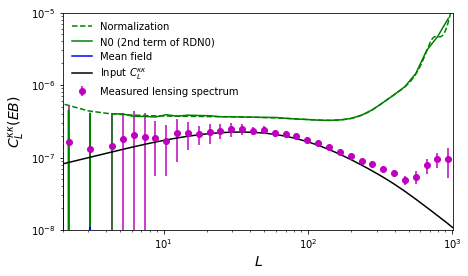

In [28]:
l = qobj.l
mb = bn.multipole_binning(40,lmin=1,lmax=1024,spc='log')
mkk, vkk, skk = bn.binned_spec(mb,qobj.f[q].cl[1:101],cn=1,doreal=False)
pl.plot_1dstyle(fsize=[7,4],ylab='$C_L^{\kappa\kappa} ('+q+')$',xmin=2,xmax=1024,xlog=True,ylog=True,ymin=1e-8,ymax=1e-5)
plot(l,al,'g--',label='Normalization')
plot(mb.bc,bn.binning(n0,mb),'g',label='N0 (2nd term of RDN0)')
plot(mb.bc,bn.binning(ml-cl/100.,mb),'b',label='Mean field')
errorbar(mb.bc,bn.binning(cl-n0-cl/100.,mb),yerr=vkk,fmt='o',label='Measured lensing spectrum',color='m')
plot(glob.l,glob.kk,'k',label=r'Input $C_L^{\kappa\kappa}$')
legend()
show()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


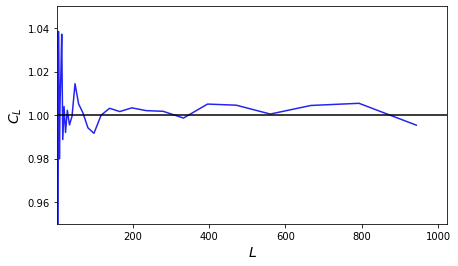

In [30]:
pl.plot_1dstyle(xmin=2,xmax=1024,ymin=0.95,ymax=1.05)
plot(mb.bc,bn.binning(xl,mb)/bn.binning(glob.kk[:qobj.olmax+1],mb))
axhline(1,color='k')
#savefig('fig_xcl_'+q+'.png')